In [2]:
import os
import folium
import numpy as np
import networkx as nx
import shapefile
import pandas as pd
from pyproj import Proj, transform 
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'shapefile'

In [14]:
#shapefile 이용해서 shp 읽어오기
shp_path_node = './%5b2018-07-11%5d 전국표준노드링크/MOCT_NODE.shp' #node = 점
sf_node = shapefile.Reader(shp_path_node)
shp_path_link = './%5b2018-07-11%5d 전국표준노드링크/MOCT_LINK.shp' #link = 선
sf_link = shapefile.Reader(shp_path_link)


fields_node = [x[0] for x in sf_node.fields][1:]
records_node = sf_node.records()
shps = [s.points for s in sf_node.shapes()] # node has coordinate data.
# link
fields_link = [x[0] for x in sf_link.fields][1:]
records_link = sf_link.records()

#write the records into a dataframe
#node
node_dataframe = pd.DataFrame(columns=fields_node, data=records_node)
#add the coordinate data to a column called "coords"
node_dataframe = node_dataframe.assign(coords=shps)
# link
link_dataframe = pd.DataFrame(columns=fields_link, data=records_link)

In [15]:
link_dataframe

,LINK_ID,F_NODE,T_NODE,ROAD_USE,LANES,ROAD_RANK,ROAD_NAME,MULTI_LINK,CONNECT,MAX_SPD,...,WORKSTATE,DEPT_CODE,STNL_REG,ROAD_TYPE,ROAD_NO,TMPID,UPLOAD_ID,SOSFNODEID,SOSTNODEID,SHAPE_STLe
0,2650003819,2650001503,2650001502,0,1.0,106,b'\xc1\xf6\xb9\xe6\xb5\xb5446\xc8\xa3\xbc\xb1',0,000,50.0,...,5,42000,265,000,446,,,,,2458.359235
1,2650003719,2650001502,2650001503,0,1.0,106,b'\xc1\xf6\xb9\xe6\xb5\xb5446\xc8\xa3\xbc\xb1',0,000,50.0,...,5,42000,265,000,446,,,,,2456.521198
2,2650003817,2650001505,2650001504,0,1.0,106,b'\xc1\xf6\xb9\xe6\xb5\xb5446\xc8\xa3\xbc\xb1',0,000,50.0,...,5,42000,265,000,446,,,,,3899.603075
3,2650003718,2650001503,2650001504,0,1.0,106,b'\xc1\xf6\xb9\xe6\xb5\xb5446\xc8\xa3\xbc\xb1',0,000,50.0,...,5,42000,265,003,446,,,,,72.692354
4,2650003818,2650001504,2650001503,0,1.0,106,b'\xc1\xf6\xb9\xe6\xb5\xb5446\xc8\xa3\xbc\xb1',0,000,50.0,...,5,42000,265,003,446,,,,,73.238101
5,2650003717,2650001504,2650001505,0,1.0,106,b'\xc1\xf6\xb9\xe6\xb5\xb5446\xc8\xa3\xbc\xb1',0,000,50.0,...,5,42000,265,000,446,,,,,3902.186686
6,2650003816,2650001506,2650001505,0,1.0,106,b'\xc1\xf6\xb9\xe6\xb5\xb5446\xc8\xa3\xbc\xb1',0,000,50.0,...,5,42000,265,003,446,,,,,63.590329
7,2650003716,2650001505,2650001506,0,1.0,106,b'\xc1\xf6\xb9\xe6\xb5\xb5446\xc8\xa3\xbc\xb1',0,000,50.0,...,5,42000,265,003,446,,,,,57.465244
8,2650003715,2650001506,2650001507,0,1.0,106,b'\xc1\xf6\xb9\xe6\xb5\xb5446\xc8\xa3\xbc\xb1',0,000,50.0,...,5,42000,265,000,446,,,,,1237.866192
9,2650003813,2650001509,2650001508,0,1.0,106,b'\xc1\xf6\xb9\xe6\xb5\xb5446\xc8\xa3\xbc\xb1',0,000,50.0,...,5,42000,265,000,446,,,,,161.947371


In [16]:
node_dataframe

,NODE_ID,NODE_TYPE,NODE_NAME,TURN_P,REMARK,USER_ID,WORKSTATE,DEPT_CODE,STNL_REG,TMPID,UPLOAD_ID,coords
0,3330017400,101,b'\xb0\xed\xc0\xbe\xb1\xb3\xc2\xf7\xb7\xce',0,,korea,5,,333,OEXT3330017400,,"[[229757.35709999967, 251792.7910999991]]"
1,3330016500,104,b'\xb9\xfa\xb1\xb3\xc5\xcd\xb3\xce',0,,korea,5,,333,OEXT3330016500,,"[[229535.21800000034, 250194.52040000074]]"
2,3330015600,104,b'\xb9\xfa\xb1\xb3\xc5\xcd\xb3\xce',0,,korea,5,,333,OEXT3330015600,,"[[229465.27020000014, 249416.52300000004]]"
3,3330014900,101,b'\xb9\xfa\xb1\xb3\xb1\xb3\xc2\xf7\xb7\xce',0,,korea,5,,333,OEXT3330014900,,"[[229455.64099999983, 249249.00129999965]]"
4,3330014600,101,b'\xb9\xfa\xb1\xb3\xb1\xb3\xc2\xf7\xb7\xce',0,,korea,5,,333,OEXT3330014600,,"[[229412.60429999977, 249169.92640000023]]"
5,3330014700,101,b'\xb9\xfa\xb1\xb3\xb1\xb3\xc2\xf7\xb7\xce',0,,korea,5,,333,OEXT3330014700,,"[[229481.83690000046, 249177.35280000046]]"
6,3330014200,101,b'\xb9\xfa\xb1\xb3\xb1\xb3\xc2\xf7\xb7\xce',0,,korea,5,,333,OEXT3330014200,,"[[229446.52630000003, 249114.33320000023]]"
7,3330014500,101,b'\xb9\xfa\xb1\xb3\xb1\xb3\xc2\xf7\xb7\xce',0,,korea,5,,333,OEXT3330014500,,"[[229181.22979999986, 249159.28959999979]]"
8,3330013800,101,b'\xb9\xfa\xb1\xb3\xb1\xb3\xc2\xf7\xb7\xce',0,,korea,5,,333,OEXT3330013800,,"[[229431.90579999983, 248937.77840000018]]"
9,3330014800,101,b'\xb9\xfa\xb1\xb3\xb1\xb3\xc2\xf7\xb7\xce',0,,korea,5,,333,OEXT3330014800,,"[[229684.77219999954, 249200.4308000002]]"


In [17]:
# 인천지역으로만 잘라내기
range_STNL_REG=range(161,170) 
df_node = pd.DataFrame()
df_link = pd.DataFrame()
for ii in range_STNL_REG:
    res_node = node_dataframe[node_dataframe['STNL_REG'] == str(ii) ] 
    res_link = link_dataframe[link_dataframe['STNL_REG'] == str(ii) ]
    df_node = pd.concat([df_node,res_node],ignore_index=True) 
    df_link = pd.concat([df_link,res_link],ignore_index=True)

In [18]:
# 노드이름 한글로 변환
for idx,row in df_node.iterrows():
    if type(row['NODE_NAME']) == bytes :
        # row['NODE_NAME'] = row['NODE_NAME'].decode('euc_kr')
        row['NODE_NAME'] = row['NODE_NAME'].decode('cp949')

In [19]:
# 좌표계를 구글에서 쓰는것으로 변환
inProj = Proj(init = 'epsg:5186')
outProj= Proj(init = 'epsg:4326')
latitude = []
longitude= []
for idx,row in df_node.iterrows():
    x,y  = row.coords[0][0],row.coords[0][1]  
    nx,ny = transform(inProj,outProj,x,y)     
    latitude.append(ny)
    longitude.append(nx)
df_node['latitude'] = latitude
df_node['longitude']= longitude
del df_node['coords'] # delete coords

In [20]:
df_node.rename(columns={'NODE_ID':'Id'},inplace = True)
df_link.rename(columns={'F_NODE':'Source','T_NODE':'Target'},inplace = True)

In [21]:
df_node

,Id,NODE_TYPE,NODE_NAME,TURN_P,REMARK,USER_ID,WORKSTATE,DEPT_CODE,STNL_REG,TMPID,UPLOAD_ID,latitude,longitude
0,1610003100,104,영종대교 서단(상하부도로 합류),0,,seoul,5,00000,161,999,,37.535279,126.560037
1,1610003000,108,공항입구IC(본선),0,,seoul,5,00000,161,999,,37.507276,126.512479
2,1610002900,108,공항입구IC 서측(연결로),0,,icsi,5,00000,161,999,,37.506817,126.503792
3,1610002400,104,삼목지하차도,0,,icsi,5,00000,161,999,,37.491616,126.481301
4,1610002300,108,공항신도시IC 북측(본선 서울방,0,,seoul,5,00000,161,999,,37.489293,126.491712
5,1610002100,108,공항신도시IC 남측(본선 공항방,0,,seoul,5,00000,161,999,,37.482697,126.487115
6,1610000800,108,신불IC 북측(본선 서울방향),0,,seoul,5,00000,161,999,,37.461884,126.488620
7,1610000700,108,신불IC 서측(연결로),0,,icsi,5,00000,161,999,,37.459060,126.485828
8,1610000600,101,신불IC남측(본선 공항방향),0,,icsi,5,00000,161,999,,37.451570,126.488896
9,1610000500,101,인천국제공항 입구,0,,icsi,5,00000,161,999,,37.445187,126.463702


In [22]:
df_link

,LINK_ID,Source,Target,ROAD_USE,LANES,ROAD_RANK,ROAD_NAME,MULTI_LINK,CONNECT,MAX_SPD,...,WORKSTATE,DEPT_CODE,STNL_REG,ROAD_TYPE,ROAD_NO,TMPID,UPLOAD_ID,SOSFNODEID,SOSTNODEID,SHAPE_STLe
0,1610006700,1610003100,1680004000,0,3.0,101,b'\xc0\xce\xc3\xb5\xb1\xb9\xc1\xa6\xb0\xf8\xc7...,0,000,100.0,...,5,50000,161,003,130,,nodelinkmanager2017010217,,,5416.077799
1,1610006300,1610003100,1610003000,0,4.0,101,b'\xc0\xce\xc3\xb5\xb1\xb9\xc1\xa6\xb0\xf8\xc7...,0,000,100.0,...,5,50000,161,003,130,,nodelinkmanager2017010217,,,5288.633501
2,1610006500,1680003800,1610003100,0,2.0,101,b'\xc0\xce\xc3\xb5\xb1\xb9\xc1\xa6\xb0\xf8\xc7...,0,000,80.0,...,5,50000,161,003,130,,nodelinkmanager2017010217,,,4230.756170
3,1610001500,1610000800,1610000700,0,1.0,101,b'\xc0\xce\xc3\xb5\xb1\xb9\xc1\xa6\xb0\xf8\xc7...,0,101,50.0,...,5,50000,161,000,130,,nodelinkmanager2017010217,,,637.201873
4,1610005900,1610002900,1610003000,0,2.0,101,b'\xc0\xce\xc3\xb5\xb1\xb9\xc1\xa6\xb0\xf8\xc7...,0,101,50.0,...,5,50000,161,000,130,,nodelinkmanager2017010217,,,891.589075
5,1610004400,1610002300,1610002200,0,1.0,101,b'\xc0\xce\xc3\xb5\xb1\xb9\xc1\xa6\xb0\xf8\xc7...,0,101,60.0,...,5,50000,161,000,130,,nodelinkmanager2017010217,,,631.115857
6,1610004300,1610002200,1610002300,0,2.0,101,b'\xc0\xce\xc3\xb5\xb1\xb9\xc1\xa6\xb0\xf8\xc7...,0,101,60.0,...,5,50000,161,000,130,,nodelinkmanager2017010217,,,1402.074622
7,1610004600,1610002100,1610002200,0,2.0,101,b'\xc0\xce\xc3\xb5\xb1\xb9\xc1\xa6\xb0\xf8\xc7...,0,101,60.0,...,5,50000,161,000,130,,nodelinkmanager2017010217,,,1191.624567
8,1610005000,1610002200,1610002400,0,4.0,101,b'\xc0\xce\xc3\xb5\xb1\xb9\xc1\xa6\xb0\xf8\xc7...,0,000,60.0,...,5,50000,161,000,130,,nodelinkmanager2017010217,,,572.818448
9,1610002900,1610000800,1610002100,0,4.0,101,b'\xc0\xce\xc3\xb5\xb1\xb9\xc1\xa6\xb0\xf8\xc7...,0,000,100.0,...,5,50000,161,000,130,,nodelinkmanager2017010217,,,2363.364092


In [23]:
#인천 노드 링크 저장
df_node.to_csv('Incheon_nodes_180711.csv') 
df_link.to_csv('Incheon_links_180711.csv') 

In [24]:
nodes = pd.read_csv('Incheon_nodes_180711.csv')
links = pd.read_csv('Incheon_links_180711.csv')

In [25]:
nodes = nodes[['Id','NODE_NAME','latitude','longitude']]
nodes.head()

,Id,NODE_NAME,latitude,longitude
0,1610003100,영종대교 서단(상하부도로 합류),37.535279,126.560037
1,1610003000,공항입구IC(본선),37.507276,126.512479
2,1610002900,공항입구IC 서측(연결로),37.506817,126.503792
3,1610002400,삼목지하차도,37.491616,126.481301
4,1610002300,공항신도시IC 북측(본선 서울방,37.489293,126.491712


In [14]:
links = links[['Source','Target']]
links.head()

,Source,Target
0,1610003100,1680004000
1,1610003100,1610003000
2,1680003800,1610003100
3,1610000800,1610000700
4,1610002900,1610003000


In [15]:
source_in = links['Source'].apply(lambda x : x in list(nodes['Id'])) # check Sources are in incheon_id
target_in = links['Target'].apply(lambda x : x in list(nodes['Id'])) # check Targets are in incheon_id
# source_in and target_in are boolean type pandas.Series which contains True or False
incheon_links = links[source_in & target_in] # contain if both target and source are contained in incheon_id

In [18]:
G = nx.Graph()
# R is the Earth's radius
R = 6371e3

for idx,row in nodes.iterrows():
    # add node to Graph G
    G.add_node(row['Id'],Label=row['NODE_NAME'],latitude=row['latitude'], longitude=row['longitude'])

for idx,row in incheon_links.iterrows():
    ## Calculate the distance between Source and Target Nodes
    lon1 = float(nodes[nodes['Id'] == row['Source']]['longitude'] * np.pi/180)
    lat1 = float(nodes[nodes['Id'] == row['Source']]['latitude'] * np.pi/180)
    lon2 = float(nodes[nodes['Id'] == row['Target']]['longitude'] * np.pi/180)
    lat2 = float(nodes[nodes['Id'] == row['Target']]['latitude'] * np.pi/180)
    d_lat = lat2 - lat1
    d_lon = lon2 - lon1
    a = np.sin(d_lat/2) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(d_lon/2) ** 2
    c = 2 * np.arctan2(a**0.5, (1-a) ** 0.5)
    d = R * c
    
    # Link attribute : 'Source', 'Target' and weight = 'Length between them'
    G.add_edge(row['Source'],row['Target'],weight = d)

In [3]:
origin_node_incheon = pd.read_csv('Incheon_nodes_180711.csv',index_col = 'Id')
origin_link_incheon = pd.read_csv('Incheon_links_180711.csv',index_col = 'LINK_ID')
origin_node_incheon = origin_node_incheon[['NODE_TYPE','NODE_NAME','latitude','longitude']]
origin_link_incheon = origin_link_incheon[['Source','Target']]

In [7]:
node_101 = origin_node_incheon[origin_node_incheon.NODE_TYPE == 101]
node_not_101 = origin_node_incheon[origin_node_incheon.NODE_TYPE != 101]
link_not_101 = pd.DataFrame()
for idx in node_not_101.index:
    df1 = origin_link_incheon[origin_link_incheon.Source == idx]
    df2 = origin_link_incheon[origin_link_incheon.Target == idx]
    link_not_101 = pd.concat([df1,df2,link_not_101], sort = True)

In [8]:
G = nx.DiGraph()

G.add_nodes_from(origin_node_incheon.index, node_type = origin_node_incheon.NODE_TYPE, latitude = origin_node_incheon.latitude, longitude = origin_node_incheon.longitude)
G.add_edges_from(list(origin_link_incheon[['Source', 'Target']].itertuples(index=False, name=None)))

In [9]:
a = []
for Id in node_not_101.index:
    for i in range(len(list(G.neighbors(Id)))):
        for r in range(len(list(G.neighbors(Id)))):
            if list(G.neighbors(Id))[i] != list(G.neighbors(Id))[r]:
                a.append((list(G.neighbors(Id))[i],list(G.neighbors(Id))[r]))
            else:
                continue

In [10]:
G.remove_nodes_from(node_not_101.index)
G.add_edges_from(a)

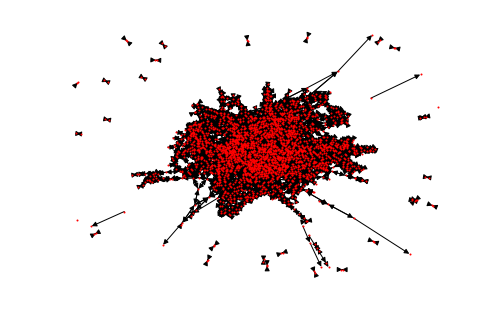

In [13]:
plt.show(nx.draw(G,node_size = 1))

In [ ]:
nodes = 

In [26]:
# Positioning the Standard Point for our Folium Map
std_point = tuple(node_101.head(1)[['latitude','longitude']].iloc[0])
std_point

(37.451569620668465, 126.48889598001215)

In [31]:
map_osm = folium.Map(location=std_point, zoom_start=10) 
# location : 기준이 되는 점, zoom_start : 지도 상의 zoom level 을 나타냅니다.

for ix, row in node_101.iterrows():
    location = (row['latitude'], row['longitude']) # 위도, 경도 튜플
    folium.Circle(
        location=location,
        radius= 60, # 지름이 degree에 비례하도록 설정
        color='white',
        weight=1,
        fill_opacity=0.6,
        opacity=1,
        fill_color='red',
        fill=True,  # gets overridden by fill_color
        # popup=str(row['Id'])
    ).add_to(map_osm)
    # folium.Marker(location, popup=row['NODE_NAME']).add_to(map_osm)
map_osm

In [ ]:
type_101 = df_node.loc[df_node['NODE_TYPE']=="101"].reset_index().iloc[:,1:]
#set 형식으로 만들어서 link의 source와 target
#둘중하나라도 101타입이아니면 drop 해버림.

street_set = (set(type_101['Id']))
for i in range(len(df_link)):
    if(df_link['Source'][i] not in street_set or df_link['Target'][i] not in street_set):
        df_link = df_link.drop([i],0)

In [4]:
import requests 
import ast
import re
import folium
import numpy as np
import pandas as pd
import configparser

class tmap_api:
    def __init__(self):
        self.url="https://api2.sktelecom.com/tmap/routes" # 자동차 길찾기 
        self.my_api= '7b792caa-5b8c-484d-a69b-4a8128dc2e87'
        self.headers = {}
        self.total_distance = 0
        self.total_time = 0
    def init_api(self):
        self.total_distance = 0
        self.total_time = 0
        self.load_list = []
        config = configparser.ConfigParser()
        config.read('config.ini')
        self.headers['appKey'] = config['api_key']["api_key"]
    def load(self,startX,startY,endX,endY):
        data={
        "startX" : startX,
        "startY" : startY,
        "endX" : endX, 
        "endY" : endY,
        "reqCoordType" : "WGS84GEO", #출발지, 경유지, 목적지 좌표계 유형
        "resCoordType" : "WGS84GEO",
        "angle" : "172", #각도 
        "searchOption" : 10 #경로 탐색 옵션 최단으로 설정했음
        }
        url = self.url + "?version=1&format=html"
        res = requests.post(url,headers=self.headers,data=data)
        if (res.status_code != 200):
            print("stauts_code_error")
        else:
            res = ast.literal_eval(res.text)
            self.total_distance = res['features'][0]['properties']['totalDistance']
            self.total_time = res['features'][0]['properties']['totalTime']
    def total_distance_(self):
        return int(self.total_distance)
    def total_time_(self):
        return str(round(self.total_time/60,3))+"분"

In [5]:
tmap = tmap_api()
tmap.init_api()

In [ ]:
def nodes_of_link(links,link):
    #input : links dataframe and one link
    
    link = links[links['LINK_ID']==link]
    start = link['Source']
    end = link['Target']
    return (start.values[0],end.values[0])

def find_node(nodes, node):
    node = nodes[nodes['Id'] ==node]
    return node

def find_latlon(node):
    return (node['latitude'].values[0],node['longitude'].values[0])
    
def distance(links,link):
    node_a,node_b = nodes_of_link(links,link)
    
    node_a = find_node(df_node,node_a)
    node_b = find_node(df_node,node_b)
    node_a_lat,node_a_lon = find_latlon(node_a)
    node_b_lat,node_b_lon = find_latlon(node_b)
    tmap.load(node_a_lon,node_a_lat,node_b_lon,node_b_lat)
    
    return tmap.total_distance_()

In [ ]:
distance(df_link,"1610027300") #meter단위